In [474]:
import numpy as np
import matplotlib.pyplot as plt

with open('q3_training_data.npy', 'rb') as f:
    training_data = np.load(f)

def assign_to_centroid(data_points,centroids):
    #initalize a dictionary to group data points from cluster0 to cluster(k-1)
    clusters = {f"cluster_{i}": [] for i in range(len(centroids))}
    #compute the euclidian distance from the data point to the centroid. for each datapoint check the euclidan distance for each centroid and see which 
    #check which one is the lowest
    for data_point in data_points:
        norms = []
        for centroid in centroids:
            difference = data_point - centroid 
            norm_sqaured = np.dot(difference,difference)
            norms.append(norm_sqaured)
        index_dmin = np.argmin(norms)   #index signifies which cluster is the closest to the data point
        clusters[f"cluster_{index_dmin}"].append(data_point)  #puts the the closest data point to the apprrpriate cluster

    return clusters

def update_centroid(clusters):
    new_centroids = []
    for cluster, data in clusters.items():  
        data_points_in_cluster = len(data)
        summed_vector = [0] * len(data[0])

        for vector in data:
            summed_vector = [summed_vector[i] + vector[i] for i in range(len(vector))]

        # Calculate the centroid by dividing the summed vector by the number of data points
        new_centroid = [x / data_points_in_cluster for x in summed_vector]
        new_centroids.append(new_centroid)
    
    return new_centroids

def distance(v1, v2):
    return np.dot(v1 - v2, v1 - v2)

In [490]:
initial_centroids = np.random.uniform(-5, 5, size=(5, 2))

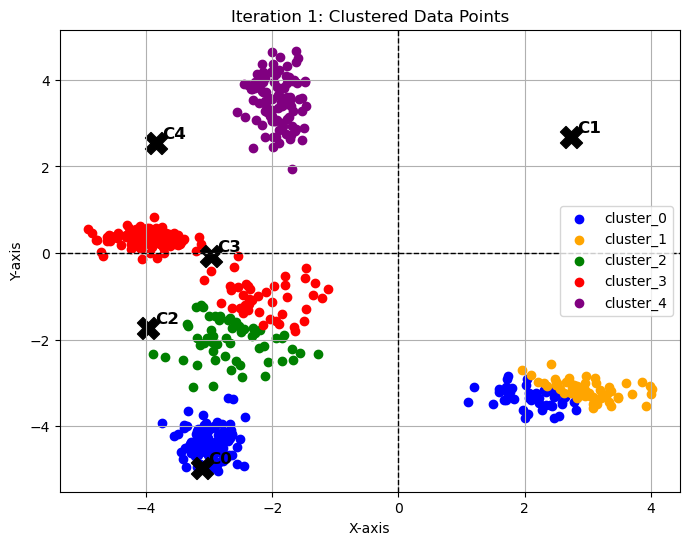

Distance squared between centroid 0 and updated centroid 0: 3.545999130263837
Distance squared between centroid 1 and updated centroid 1: 34.11495046040639
Distance squared between centroid 2 and updated centroid 2: 1.8258540025678196
Distance squared between centroid 3 and updated centroid 3: 0.20665723043978018
Distance squared between centroid 4 and updated centroid 4: 4.65893147324382


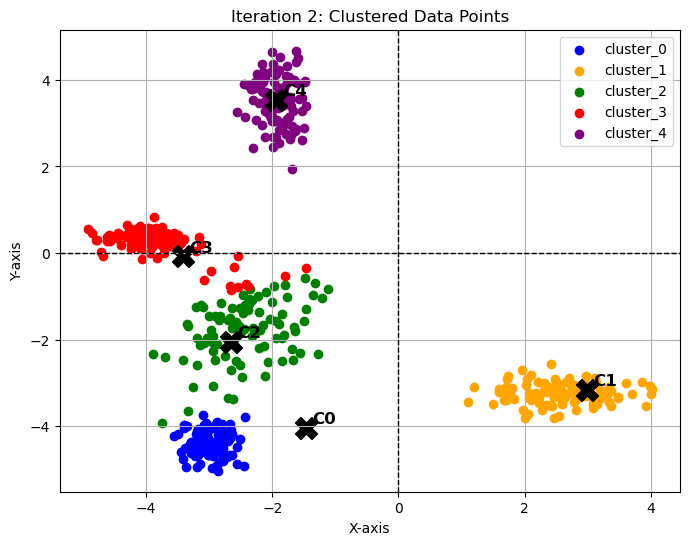

Distance squared between centroid 0 and updated centroid 0: 2.4371066745289625
Distance squared between centroid 1 and updated centroid 1: 0.16871397111460484
Distance squared between centroid 2 and updated centroid 2: 0.1015517239518087
Distance squared between centroid 3 and updated centroid 3: 0.27204381800388805
Distance squared between centroid 4 and updated centroid 4: 0.0


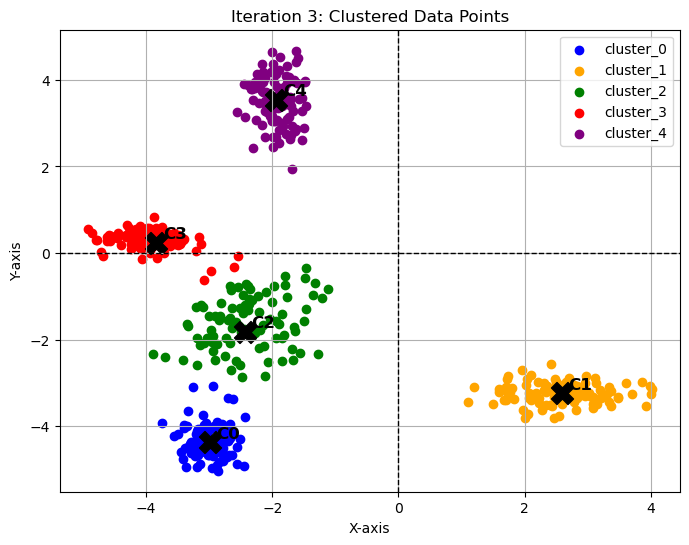

Distance squared between centroid 0 and updated centroid 0: 0.0031719475535380813
Distance squared between centroid 1 and updated centroid 1: 0.0
Distance squared between centroid 2 and updated centroid 2: 0.03937472670041899
Distance squared between centroid 3 and updated centroid 3: 0.014842137016854474
Distance squared between centroid 4 and updated centroid 4: 0.0


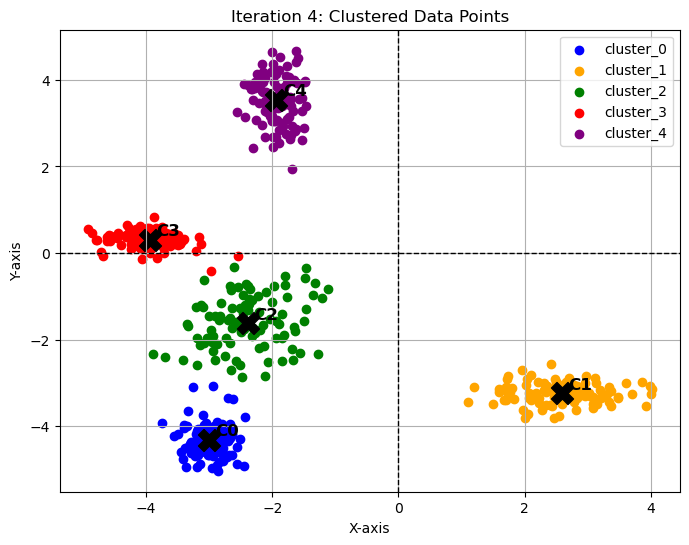

Distance squared between centroid 0 and updated centroid 0: 0.0
Distance squared between centroid 1 and updated centroid 1: 0.0
Distance squared between centroid 2 and updated centroid 2: 0.0006915804447853772
Distance squared between centroid 3 and updated centroid 3: 0.0006960135396784167
Distance squared between centroid 4 and updated centroid 4: 0.0


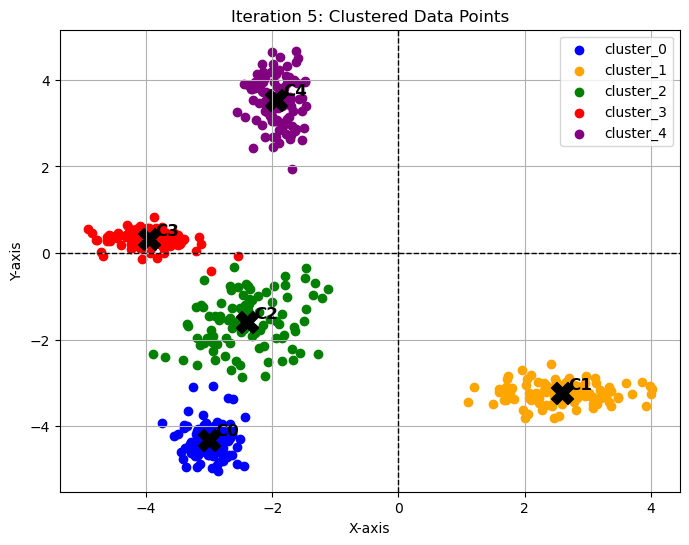

Distance squared between centroid 0 and updated centroid 0: 0.0
Distance squared between centroid 1 and updated centroid 1: 0.0
Distance squared between centroid 2 and updated centroid 2: 0.0
Distance squared between centroid 3 and updated centroid 3: 0.0
Distance squared between centroid 4 and updated centroid 4: 0.0


In [512]:
def k_means_iteration(training_data, initial_centroids, n):
    current_centroids = initial_centroids
    colors = ['blue', 'orange', 'green', 'red', 'purple']

    for iteration in range(n):
        # Assign points to the nearest centroid
        x = assign_to_centroid(training_data, current_centroids)

        # Plot the data points at the current iteration
        plt.figure(figsize=(8, 6))
        for i, (cluster_name, points) in enumerate(x.items()):
            points = np.array(points)  
            plt.scatter(points[:, 0], points[:, 1], label=cluster_name, color=colors[i])

        # Plot the centroids in current iteration
        for i, centroid in enumerate(current_centroids):
            plt.scatter(centroid[0], centroid[1], color='black', marker='X', s=250)  # Plot centroid as bold 'X'
            plt.text(centroid[0] + 0.1, centroid[1] + 0.1, f'C{i}', fontsize=12, fontweight='bold', color='black')

        # Add plot labels and title for each iteration
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.axhline(0, color='black', linewidth=1, linestyle='--')
        plt.axvline(0, color='black', linewidth=1,linestyle='--')
        plt.title(f'Iteration {iteration + 1}: Clustered Data Points')
        plt.legend()
        plt.grid(True)
        
        # Show the plot for the current iteration
        plt.show()
        current_centroids = np.array(current_centroids)
        updated_centroids = np.array(update_centroid(x))
        for i in range(len(current_centroids)):
            dist = distance(current_centroids[i], updated_centroids[i])
            print(f"Distance squared between centroid {i} and updated centroid {i}: {dist}")
        
        # Update centroids
        current_centroids = update_centroid(x)

k_means_iteration(training_data, initial_centroids, 5)


Here we got lucky with the random initializations so we could terminate the algorithim after 5 iterations since none of the centroids are being displaced from the 4th to the 5th iteration.